In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

# QUESTION 1:

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
#data.describe()

In [7]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
l = data["label"]
d = data.drop("label",axis=1)

In [9]:
l.head(10)

0    1
1    0
2    1
3    4
4    0
5    0
6    7
7    3
8    5
9    3
Name: label, dtype: int64

In [10]:
d.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
print(l.shape)  # target labels.
print(d.shape)  # total data exclluding labels.

(42000,)
(42000, 784)


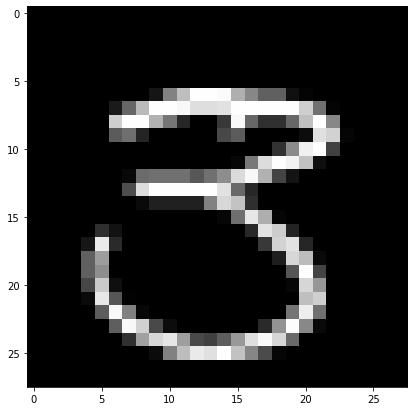

3


In [12]:
# Displaying or plotting a number
plt.figure(figsize=(7,7))
idx = 7
grid_data = d.iloc[idx].to_numpy().reshape(28,28) # from 1 D to 2D
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()
print(l[idx])

In [13]:
svd = TruncatedSVD(n_components = 25)   # By default n_components = 2.
x = svd.fit(d).transform(d)
l_m = RandomForestClassifier(n_estimators=50)
x_train, x_test, y_train, y_test = train_test_split(x,l,test_size=0.2, random_state=4)
l_m.fit(x_train,y_train)
pred = l_m.predict(x_test)
s = y_test.values
count = 0
for i in range(len(pred)):
    if pred[i]==s[i]:
        count = count + 1
count/float(len(pred))       

0.9451190476190476

# QUESTION 2:

In [14]:
l_m = LogisticRegression(multi_class='multinomial')
x_train, x_test, y_train, y_test = train_test_split(d,l,test_size=0.2, random_state=4)
l_m.fit(x_train,y_train)
pred = l_m.predict(x_test)

In [15]:
s = y_test.values
count = 0
for i in range(len(pred)):
    if pred[i]==s[i]:
        count = count + 1
count/float(len(pred))

0.9136904761904762

# QUESTION 3:

In [16]:
svd = TruncatedSVD(n_components = 25)
x = svd.fit(d).transform(d)
l_m = LogisticRegression(multi_class='multinomial')
x_train, x_test, y_train, y_test = train_test_split(x,l,test_size=0.2, random_state=4)
l_m.fit(x_train,y_train)
pred = l_m.predict(x_test)
s = y_test.values
count = 0
for i in range(len(pred)):
    if pred[i]==s[i]:
        count = count + 1
count/float(len(pred))

0.8788095238095238

# QUESTION 4:

## Finding Optimal Feature Dimension based on Accuracy

In [17]:
def svd_(i):
    svd = TruncatedSVD(n_components = i)
    x = svd.fit(d).transform(d)
    l_m = LogisticRegression(multi_class='multinomial')
    x_train, x_test, y_train, y_test = train_test_split(x,l,test_size=0.2, random_state=4)
    l_m.fit(x_train,y_train)
    pred = l_m.predict(x_test)
    s = y_test.values
    count = 0
    for i in range(len(pred)):
        if pred[i]==s[i]:
            count = count + 1
    return count/float(len(pred))

In [18]:
a=[1,5,10,15,20,25,30,35,40,45,50,55]

In [19]:
accuracy_array = [svd_(i) for i in a]
accuracy_array

[0.19404761904761905,
 0.6389285714285714,
 0.7852380952380953,
 0.8339285714285715,
 0.8697619047619047,
 0.8795238095238095,
 0.8832142857142857,
 0.8951190476190476,
 0.8992857142857142,
 0.9026190476190477,
 0.9032142857142857,
 0.9060714285714285]

Text(0.5, 1.0, 'Accuracy Vs Feature Dimension')

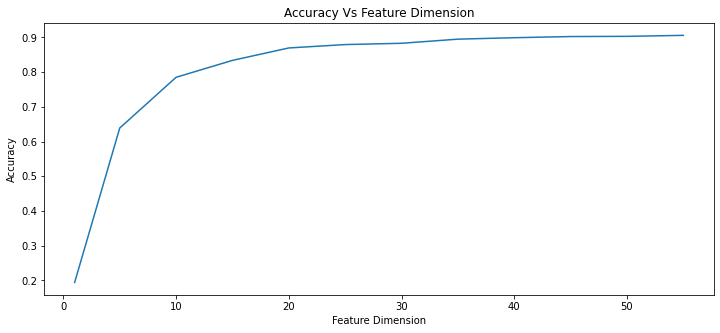

In [20]:
plt.figure(figsize=(12,5))
plt.plot(a,accuracy_array)
plt.xlabel("Feature Dimension")
plt.ylabel("Accuracy")
plt.title("Accuracy Vs Feature Dimension")

# QUESTION 5:

## Before Applying Feature Dimension

In [21]:
l_m = LogisticRegression(multi_class='multinomial')
x_train, x_test, y_train, y_test = train_test_split(d,l,test_size=0.2, random_state=4)
l_m.fit(x_train,y_train)
pred = l_m.predict(x_test)

In [22]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.96      0.97      0.97       834
     class 1       0.94      0.97      0.96       907
     class 2       0.89      0.90      0.89       843
     class 3       0.88      0.87      0.88       851
     class 4       0.93      0.93      0.93       761
     class 5       0.89      0.85      0.87       753
     class 6       0.94      0.95      0.95       858
     class 7       0.93      0.92      0.92       898
     class 8       0.88      0.88      0.88       803
     class 9       0.89      0.90      0.89       892

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400



## After Applying Feature dimension ( SVD)

In [23]:
svd = TruncatedSVD(n_components = 20)
x = svd.fit(d).transform(d)
l_m = LogisticRegression(multi_class='multinomial')
x_train, x_test, y_train, y_test = train_test_split(x,l,test_size=0.2, random_state=4)
l_m.fit(x_train,y_train)
pred1 = l_m.predict(x_test)

In [24]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(y_test, pred1, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.94      0.96      0.95       834
     class 1       0.94      0.97      0.95       907
     class 2       0.84      0.84      0.84       843
     class 3       0.83      0.83      0.83       851
     class 4       0.86      0.88      0.87       761
     class 5       0.83      0.75      0.79       753
     class 6       0.90      0.93      0.92       858
     class 7       0.91      0.89      0.90       898
     class 8       0.81      0.82      0.81       803
     class 9       0.83      0.83      0.83       892

    accuracy                           0.87      8400
   macro avg       0.87      0.87      0.87      8400
weighted avg       0.87      0.87      0.87      8400

